# Intro to PlotCollection

In [1]:
from importlib import import_module

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
from bokeh.plotting import output_notebook, show

import arviz as az
from arviz_base import load_arviz_data
import arviz_plots as azp

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
xr.set_options(display_expand_data=False);
azp.style.use("arviz-clean")

In [4]:
idata = load_arviz_data("rugby")
post = idata.posterior.ds

In [5]:
def kde_artist(values, target, **kwargs):
    backend = kwargs.pop("backend")
    plot_backend = import_module(f"arviz_plots.backend.{backend}")
    grid, pdf = az.kde(np.array(values).flatten())
    return plot_backend.line(grid, pdf, target, **kwargs)

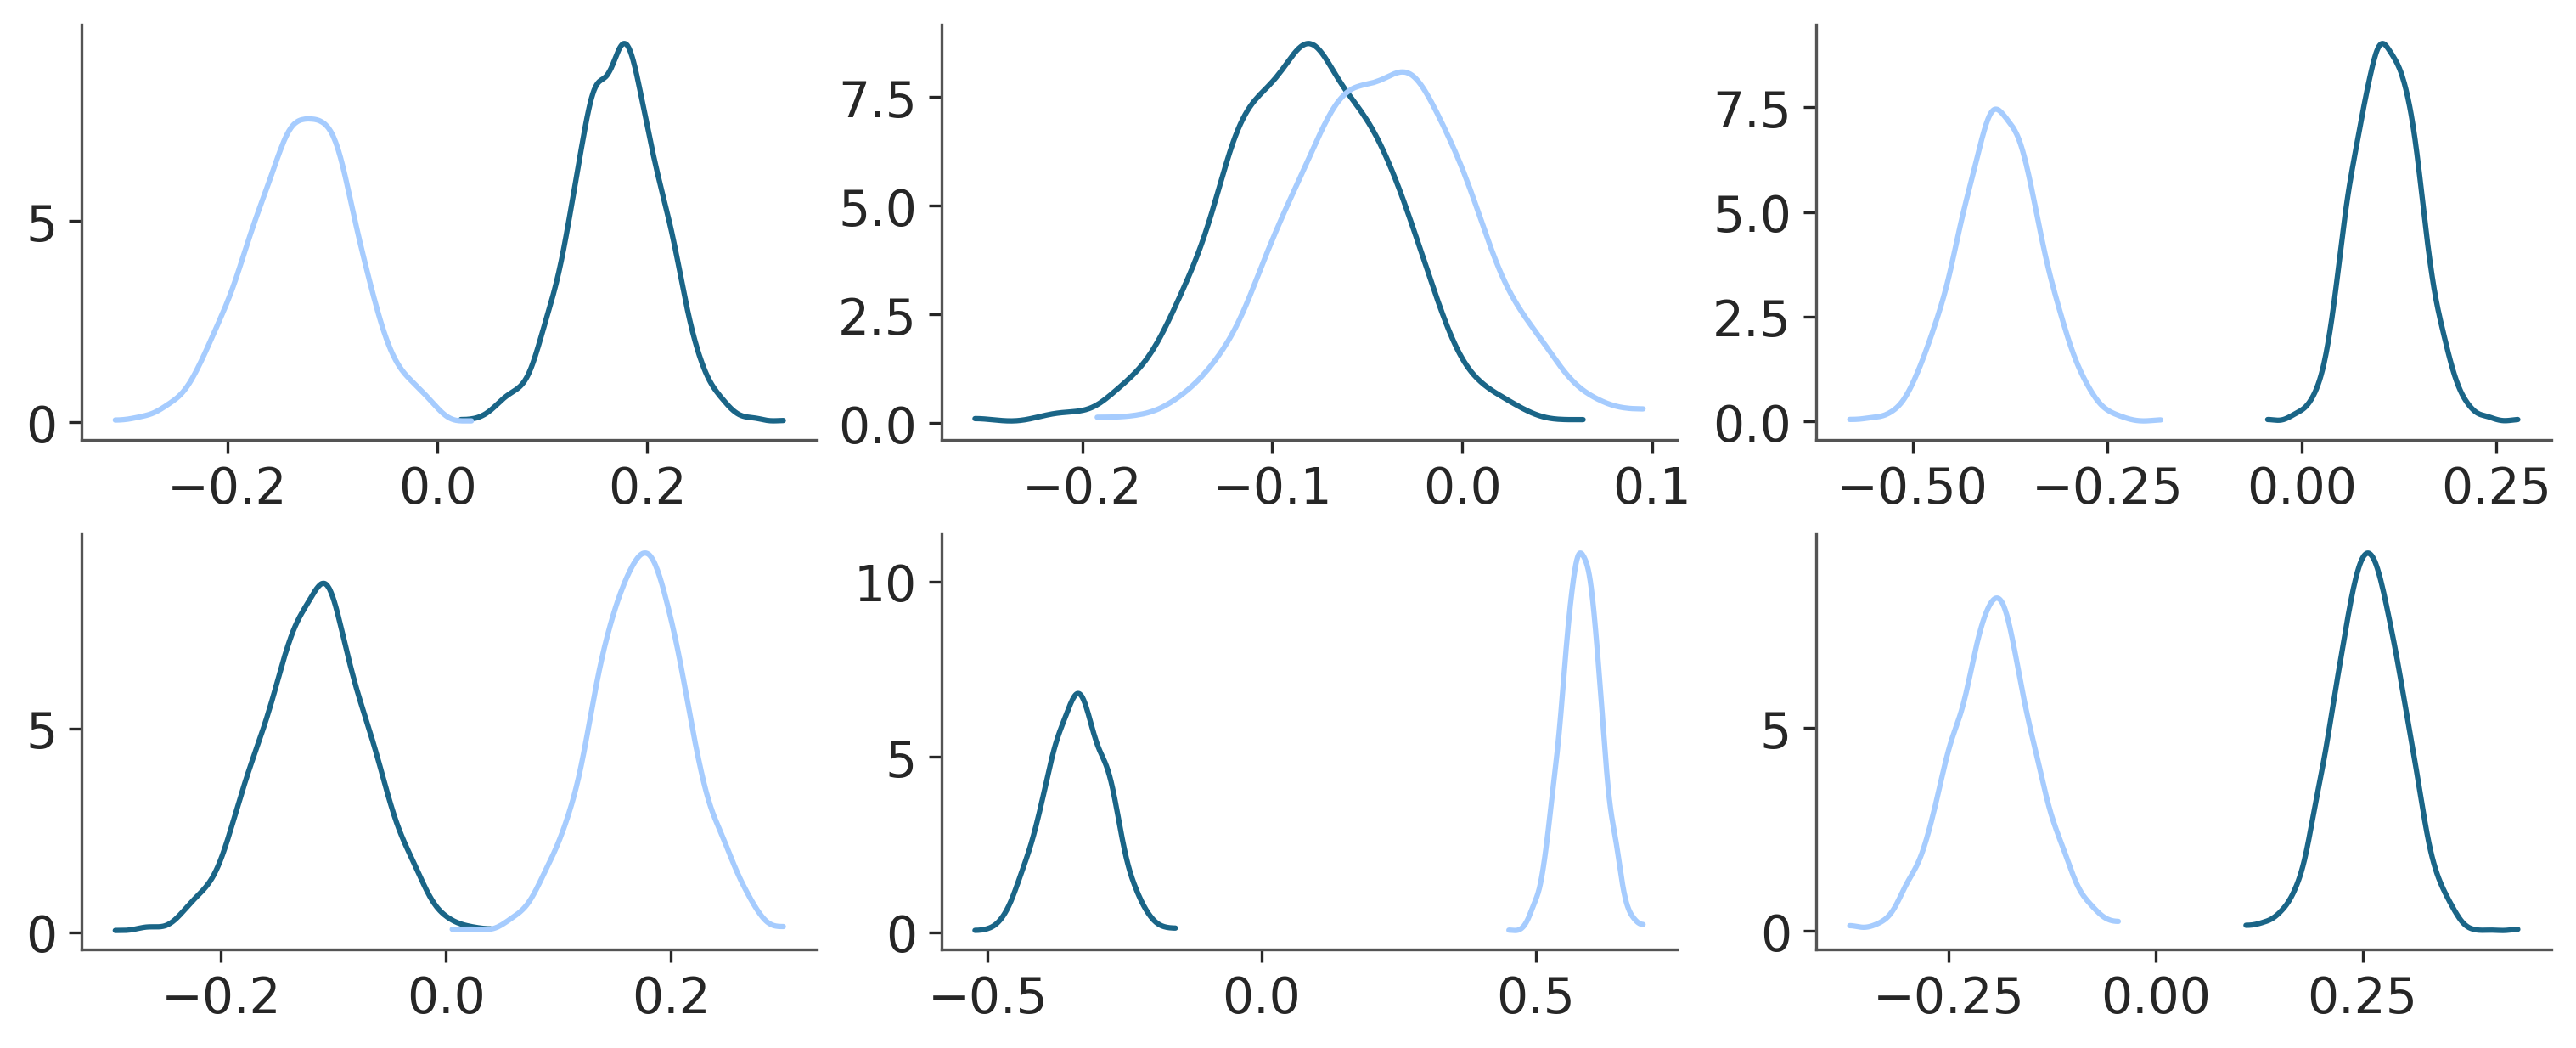

In [6]:
pc = azp.PlotCollection.wrap(
    post[["atts", "defs"]], 
    cols=["team"],
    col_wrap=3,
    plot_grid_kws={"figsize": (10, 4)}
)
pc.map(kde_artist, "kde")

In [7]:
pc = azp.PlotCollection.wrap(
    post[["atts", "defs"]], 
    cols=["team"],
    col_wrap=3,
    aes={"color": ["__variable__"]}, 
    color=[to_hex(f"C{i}") for i in range(2)],
    plot_grid_kws={"width":350, "height":200},
    backend="bokeh",
)
pc.map(kde_artist, "kde")
show(pc.viz["chart"].item())

In [8]:
from arviz_plots.plot_collection import _process_facet_dims

_process_facet_dims(post[["atts", "defs"]], ["__variable__"])

(2, {'atts': 1, 'defs': 1})

In [9]:
from arviz_plots.plot_collection import _process_facet_dims

_process_facet_dims(post[["atts", "defs"]], ["chain"])

(4, {})

In [10]:
pc.aes

DataTree('None', parent=None)
├── DataTree('atts')
│       Dimensions:  ()
│       Data variables:
│           color    <U7 '#1a6587'
└── DataTree('defs')
        Dimensions:  ()
        Data variables:
            color    <U7 '#1a6587'

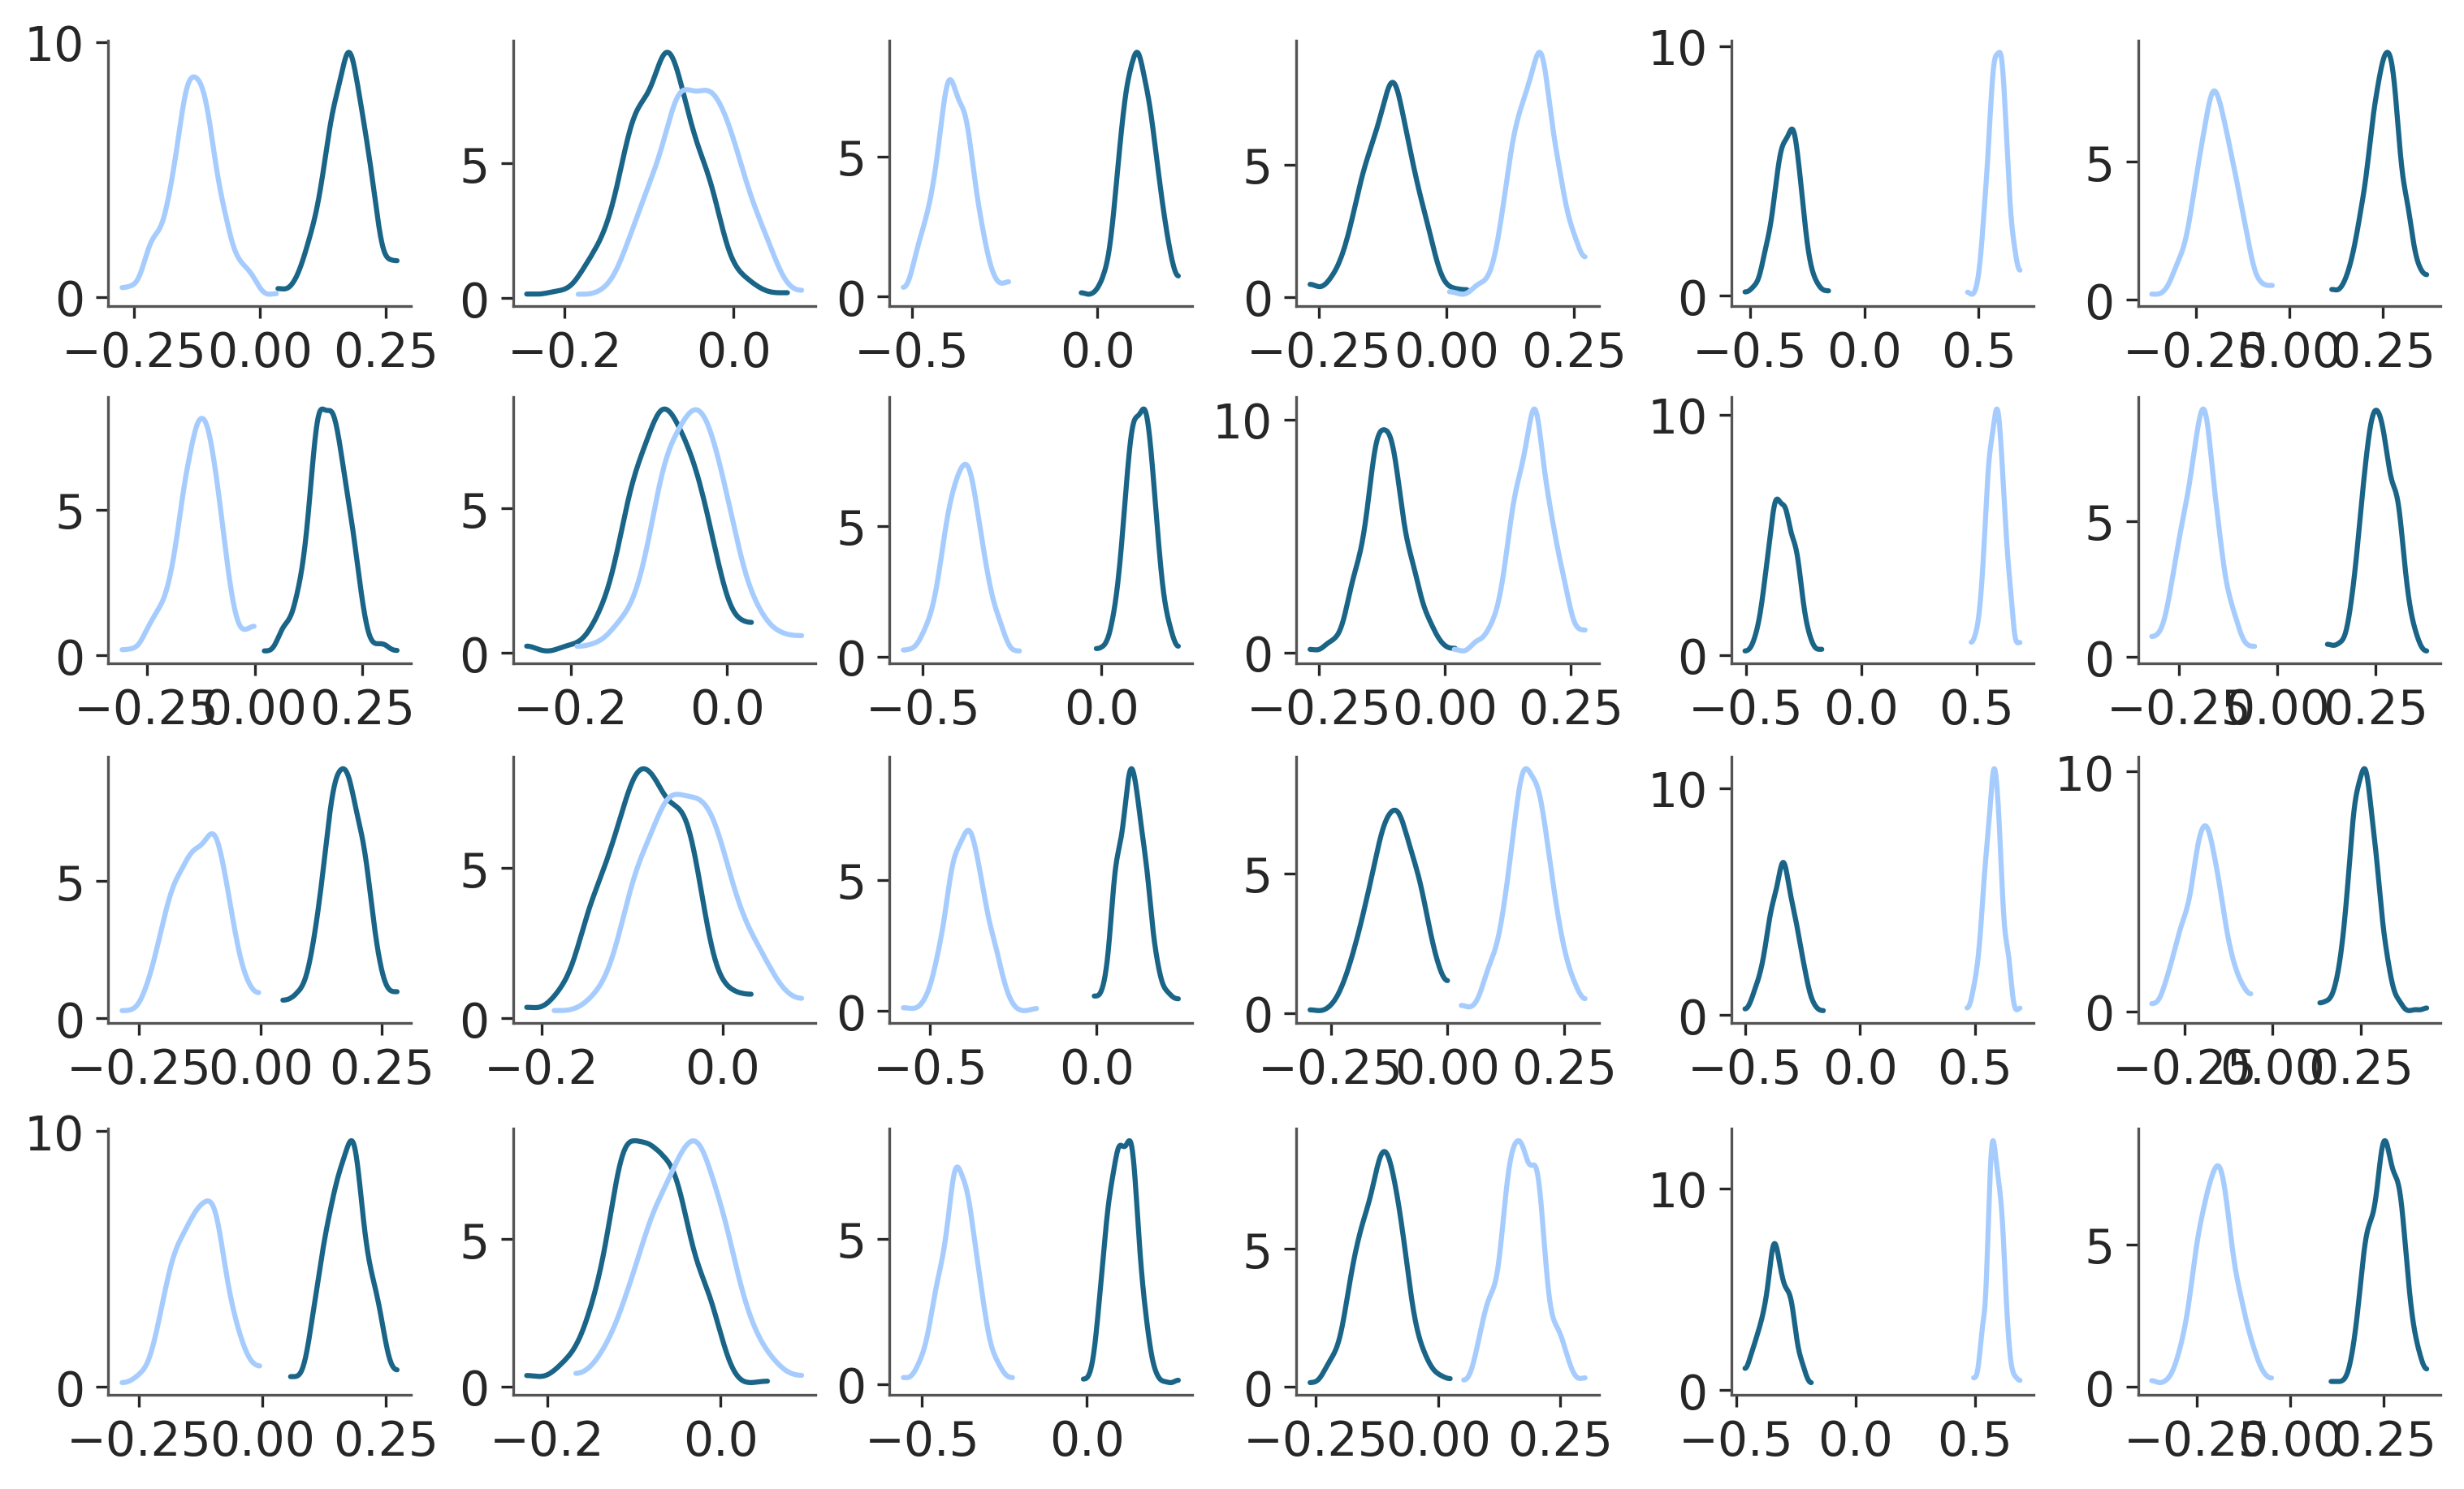

In [11]:
pc = azp.PlotCollection.grid(
    post[["atts", "defs"]], 
    cols=["team"],
    rows=["chain"], 
    plot_grid_kws={"figsize": (10, 6)}
)
pc.map(kde_artist, "kde")

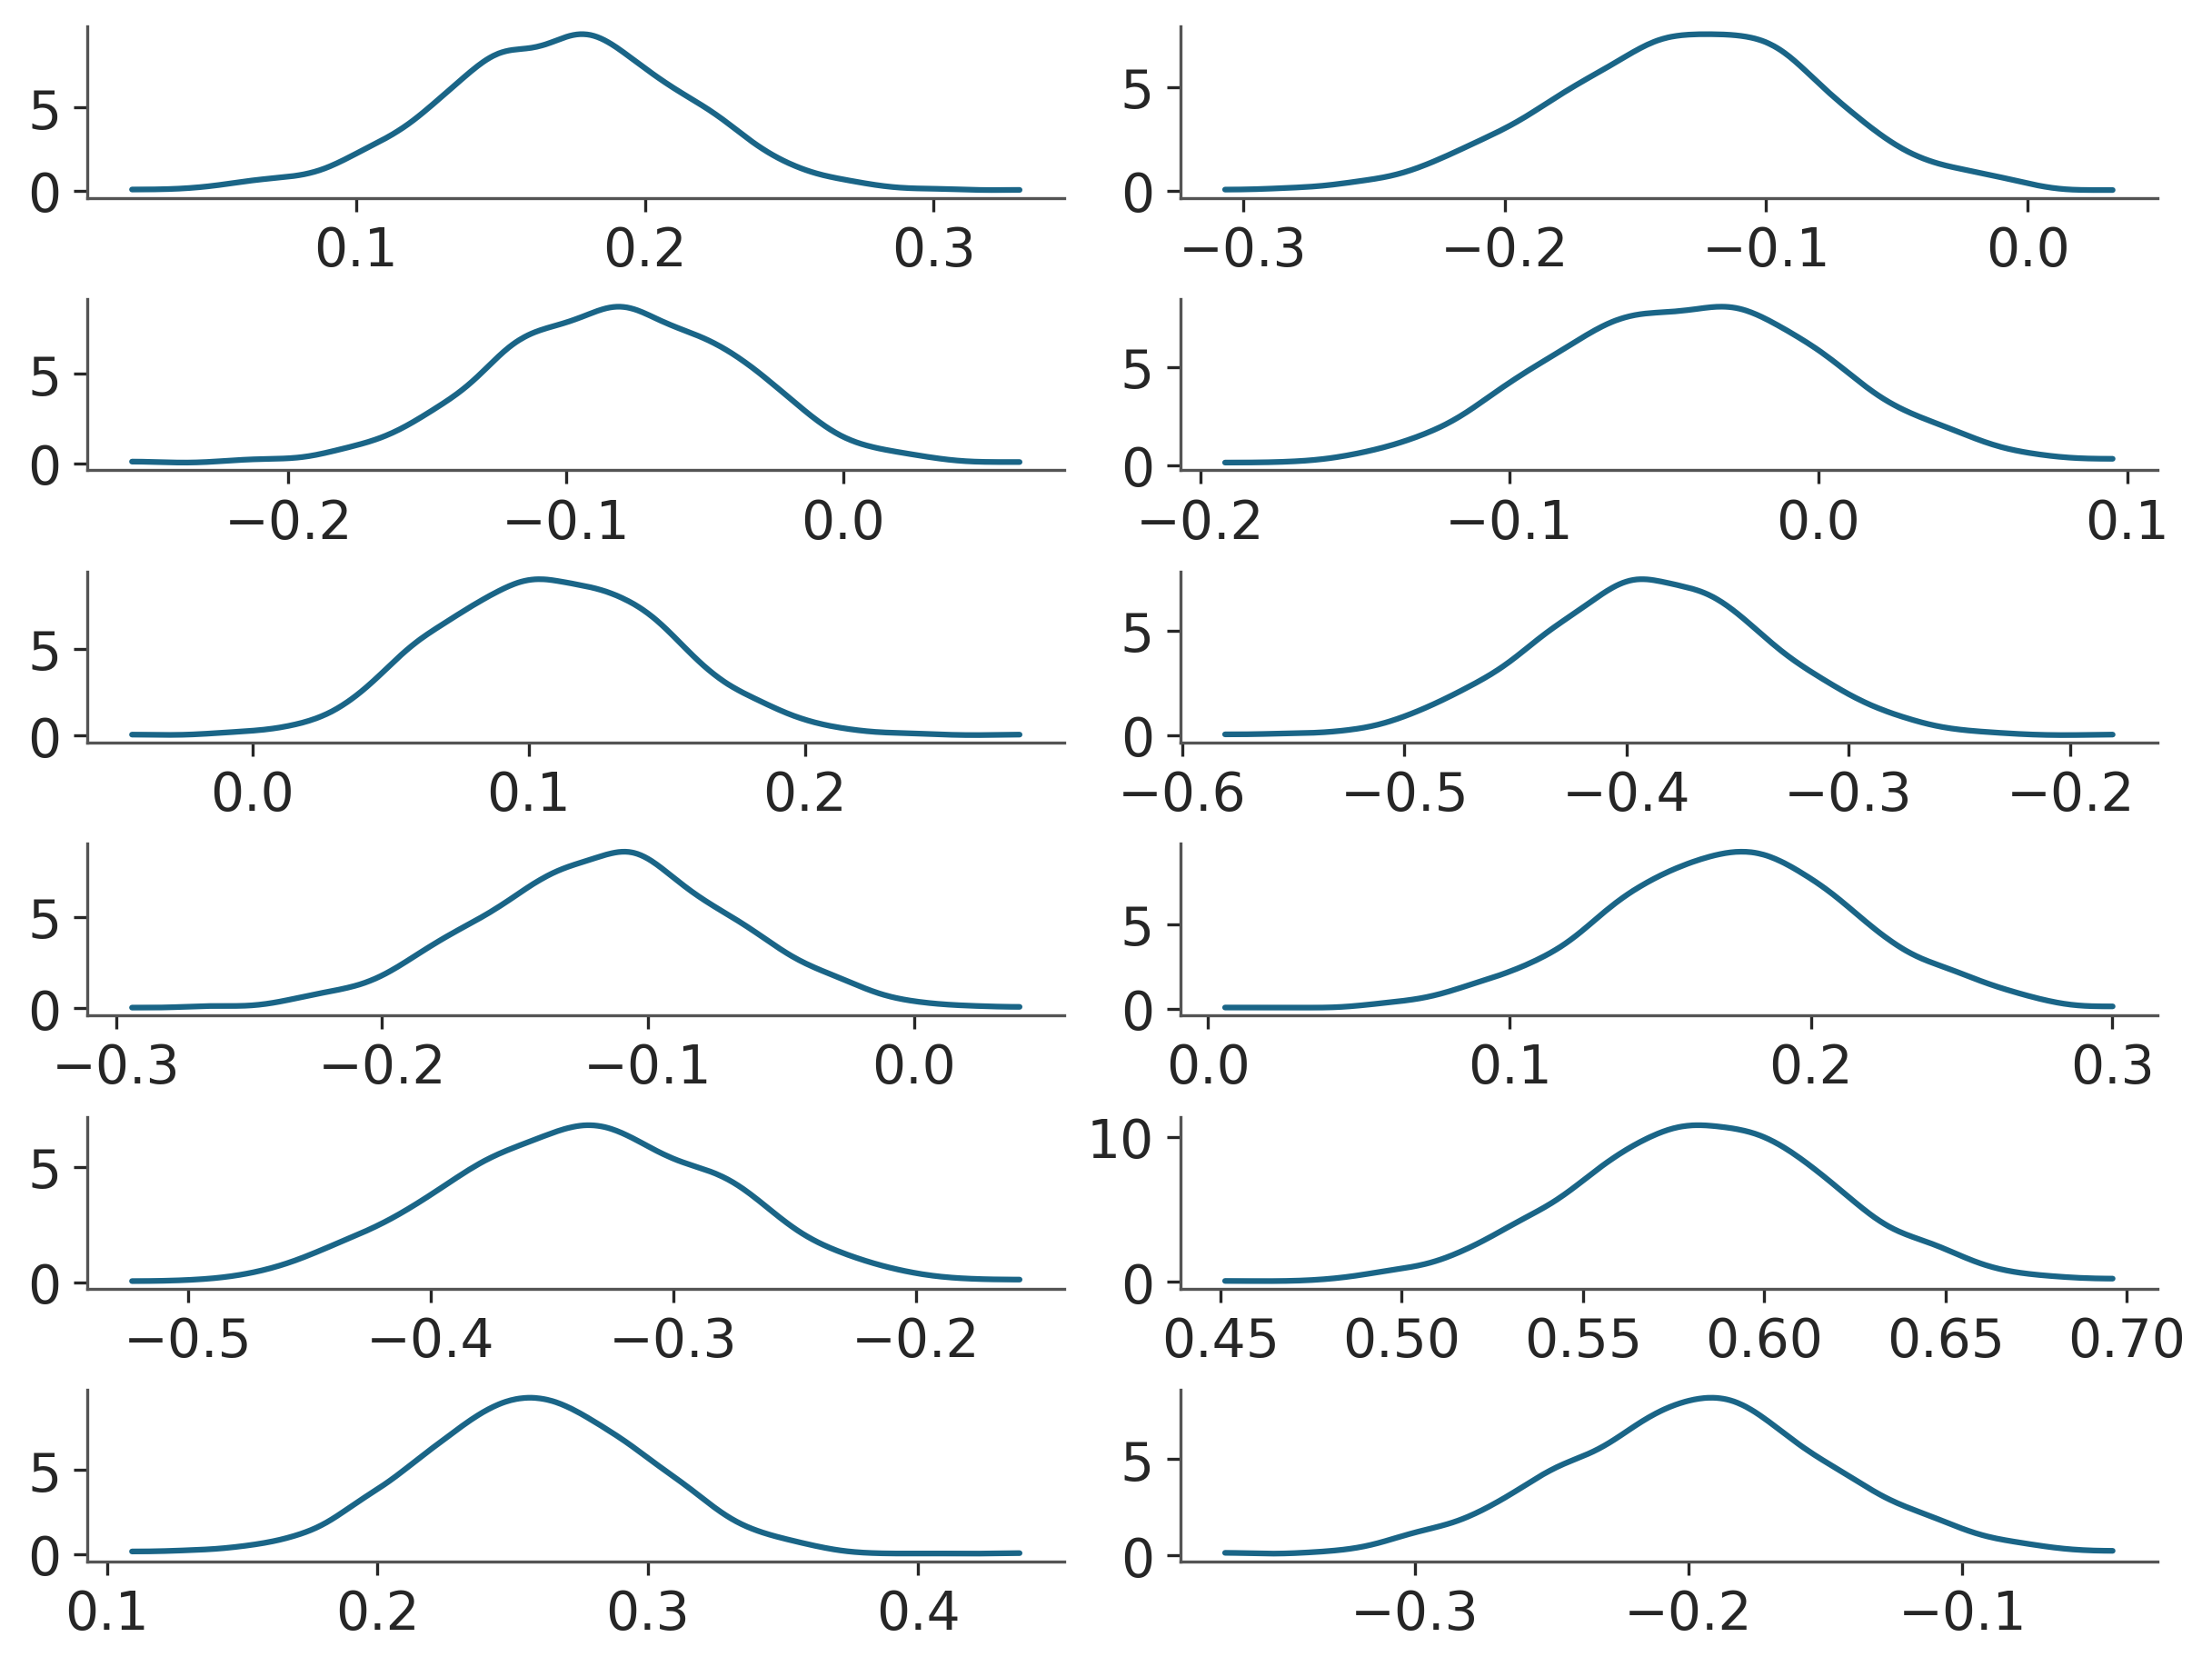

In [12]:
pc = azp.PlotCollection.grid(
    post[["atts", "defs"]], 
    cols=["__variable__"],
    rows=["team"], 
    plot_grid_kws={"figsize": (8, 6)}
)
pc.map(kde_artist, "kde")

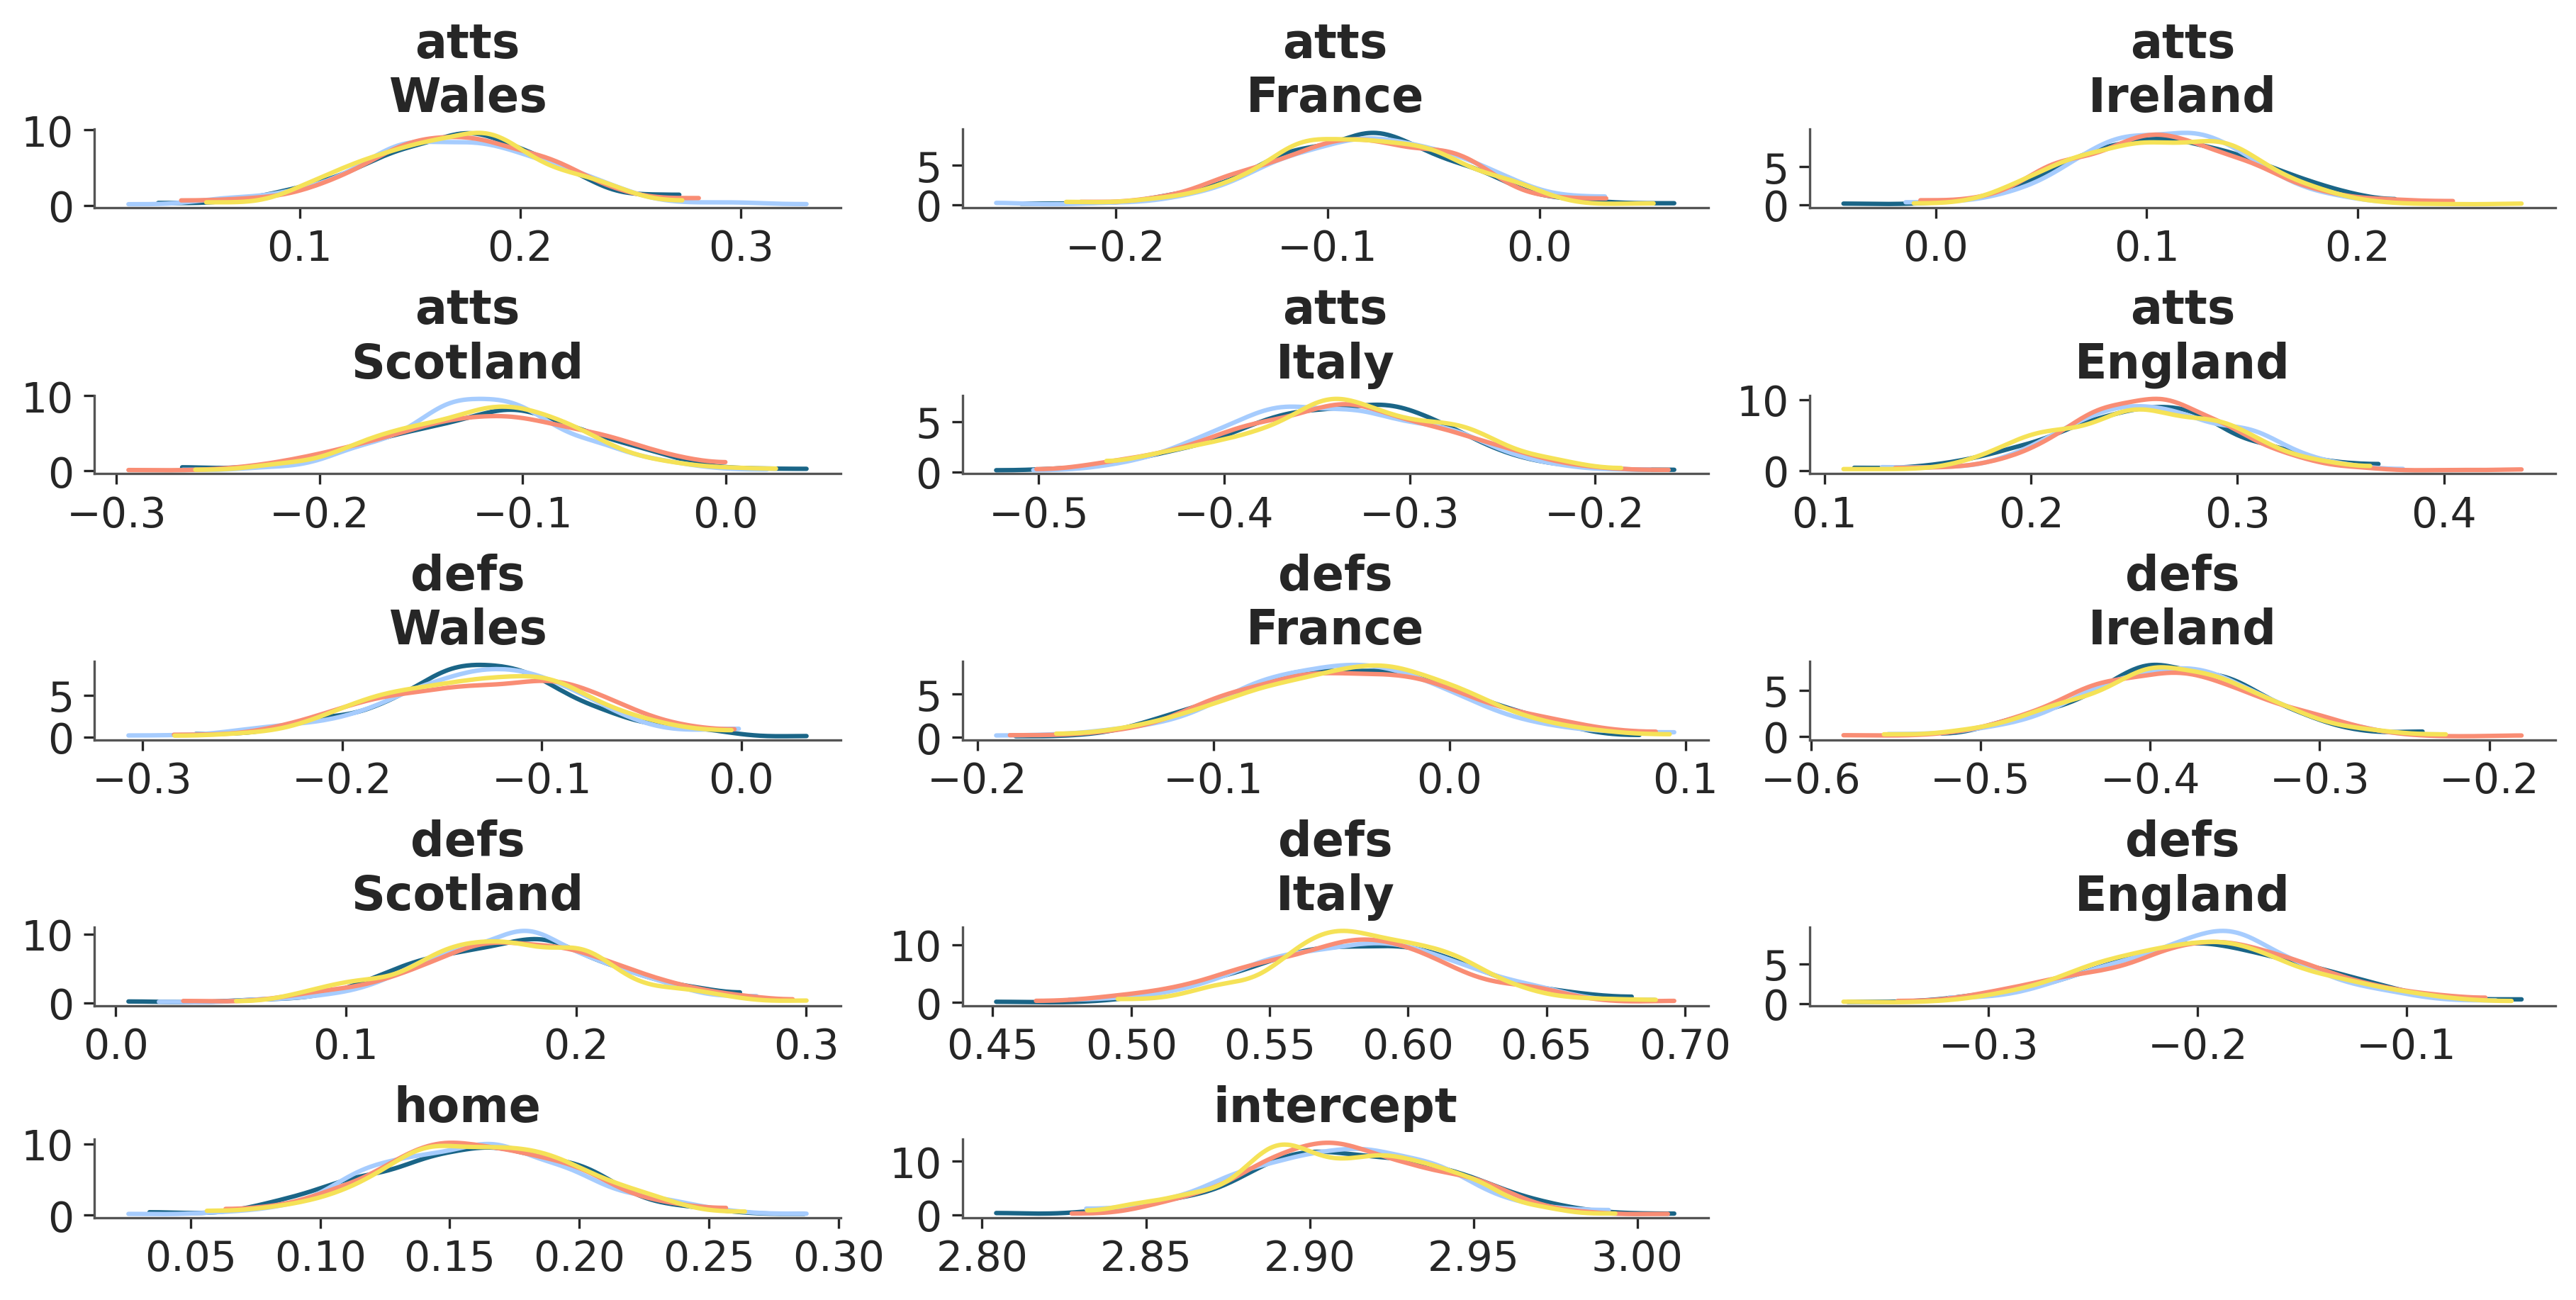

In [13]:
def title_artist(values, target, var_name, sel, isel, labeller_fun, **kwargs):
    backend = kwargs.pop("backend")
    plot_backend = import_module(f"arviz_plots.backend.{backend}")
    label = labeller_fun(var_name, sel, isel)
    return plot_backend.title(label, target, **kwargs)

pc = azp.PlotCollection.wrap(
    post[["atts", "defs", "home", "intercept"]], 
    cols=["__variable__", "team"],
    col_wrap=3,
    aes={"color": ["chain"]}, 
    color=[f"C{i}" for i in range(4)],
    plot_grid_kws={"figsize": (12, 6)},
)
pc.map(kde_artist, "kde")
# add title to help visualize what is happening
pc.map(title_artist, "title", subset_info=True, labeller_fun=az.labels.BaseLabeller().make_label_vert, ignore_aes={"color"})

In [15]:
pc = azp.PlotCollection.wrap(
    post[["atts", "defs", "home", "intercept"]], 
    cols=["__variable__", "team"],
    col_wrap=3,
    aes={"color": ["chain"]}, 
    color=[to_hex(f"C{i}") for i in range(4)],
    plot_grid_kws={"width":350, "height":200},
    backend="bokeh",
)
pc.map(kde_artist, "kde")
# add title to help visualize what is happening
pc.map(title_artist, "title", subset_info=True, labeller_fun=az.labels.BaseLabeller().make_label_vert, ignore_aes={"color"})
show(pc.viz["chart"].item())

ValueError: failed to validate Line(id='p2745', ...).line_width: expected a value of type Real, got None of type NoneType